In [390]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import style # to set the grid style 
import matplotlib.animation as animation
import seaborn as sns
import missingno as msno
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score,classification_report, log_loss
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import KFold
from sklearn import model_selection
from sklearn.model_selection import KFold
from sklearn.metrics import roc_curve, roc_auc_score
pd.set_option('display.max_columns', None)

In [391]:
df=pd.read_csv('Total_data.csv')

df.head()

,Unnamed: 0,id,parity,childwt,logit,mage,mwt,mht,mdarm,head,relg,habit,occup,educ,workload,f11,f21,f31,f41,anemia,asthma,wm18,ageyc,boh,ecostat,mwt2,belly1,fand1,sis1,dis1,inject,falif,iron,worklo,f12,f22,f32,f42,rest,conv1,d21,bleed1,blddef1,asthma2,fever1,lomot1,contab1,db1,mwt3,belly2,fand2,sis2,dia2,inject2,falif2,iron2,workl,f13,f23,f33,f43,rest1,conv2,d,bleed,blddef,asthm,fever,lomot,contab,db,wg1,wg2,BMI,lda
0,42,101007,3,3.4,1,26.83,39.75,1.50,20.0,51.0,1,0,0,0,1,5,3.0,0.0,0.0,1,0,2.0,1.75,0.0,0,43.0,71.5,17.0,100.0,70.0,0.0,20.0,0.0,1.0,6.0,2.0,0.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,46.1,80.5,25.4,100.0,80.0,1.0,30.0,1.0,1.0,3.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3.25,6.35,17.666667,1
1,27,101008,4,3.5,1,17.92,45.00,1.52,22.0,52.0,1,0,0,0,1,3,1.0,0.0,2.0,1,0,2.0,0.00,1.0,0,44.5,72.2,11.8,108.0,68.0,1.0,30.0,0.0,1.0,5.0,4.0,3.0,5.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.50,-45.00,19.477147,1
2,158,101009,1,3.0,1,35.00,43.00,1.50,20.0,53.0,0,1,1,1,1,7,5.0,0.0,4.0,1,0,2.0,4.00,1.0,1,47.0,79.5,19.0,98.0,60.0,2.0,50.0,1.0,1.0,6.0,5.0,1.0,2.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,47.5,81.5,23.0,90.0,50.0,2.0,15.0,1.0,1.0,7.0,5.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.00,4.50,19.111111,1
3,156,101010,1,3.0,1,26.00,40.00,1.48,21.0,51.5,1,0,1,0,1,2,3.0,7.0,4.0,0,0,1.0,8.00,0.0,2,44.0,71.5,12.0,100.0,50.0,2.0,13.0,1.0,1.0,7.0,4.0,7.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,47.0,78.0,20.0,102.0,52.0,2.0,50.0,1.0,1.0,7.0,3.0,7.0,2.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,4.00,7.00,18.261505,1
4,155,101013,1,3.0,1,25.00,56.00,1.51,28.0,49.5,1,0,1,0,1,7,5.0,2.0,7.0,0,0,1.0,5.00,0.0,1,54.5,83.0,12.0,106.0,42.0,2.0,20.0,0.0,1.0,7.0,4.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,59.5,85.5,19.0,98.0,62.0,2.0,30.0,1.0,1.0,7.0,3.0,1.0,7.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,-1.50,3.50,24.560326,1


In [392]:
df.columns

Index(['Unnamed: 0', 'id', 'parity', 'childwt', 'logit', 'mage', 'mwt', 'mht',
       'mdarm', 'head', 'relg', 'habit', 'occup', 'educ', 'workload', 'f11',
       'f21', 'f31', 'f41', 'anemia', 'asthma', 'wm18', 'ageyc', 'boh',
       'ecostat', 'mwt2', 'belly1', 'fand1', 'sis1', 'dis1', 'inject', 'falif',
       'iron', 'worklo', 'f12', 'f22', 'f32', 'f42', 'rest', 'conv1', 'd21',
       'bleed1', 'blddef1', 'asthma2', 'fever1', 'lomot1', 'contab1', 'db1',
       'mwt3', 'belly2', 'fand2', 'sis2', 'dia2', 'inject2', 'falif2', 'iron2',
       'workl', 'f13', 'f23', 'f33', 'f43', 'rest1', 'conv2', 'd', 'bleed',
       'blddef', 'asthm', 'fever', 'lomot', 'contab', 'db', 'wg1', 'wg2',
       'BMI', 'lda'],
      dtype='object')

In [393]:
df.describe()

,Unnamed: 0,id,parity,childwt,logit,mage,mwt,mht,mdarm,head,relg,habit,occup,educ,workload,f11,f21,f31,f41,anemia,asthma,wm18,ageyc,boh,ecostat,mwt2,belly1,fand1,sis1,dis1,inject,falif,iron,worklo,f12,f22,f32,f42,rest,conv1,d21,bleed1,blddef1,asthma2,fever1,lomot1,contab1,db1,mwt3,belly2,fand2,sis2,dia2,inject2,falif2,iron2,workl,f13,f23,f33,f43,rest1,conv2,d,bleed,blddef,asthm,fever,lomot,contab,db,wg1,wg2,BMI,lda
count,666.000000,666.000000,666.000000,666.000000,666.000000,666.000000,666.000000,666.000000,666.000000,666.000000,666.000000,666.000000,666.000000,666.000000,666.000000,666.000000,665.000000,665.000000,665.000000,666.000000,666.000000,664.000000,420.000000,408.000000,666.000000,614.000000,613.000000,612.000000,613.000000,613.000000,612.000000,601.000000,613.000000,612.000000,613.000000,609.000000,613.000000,613.000000,612.000000,613.000000,613.000000,612.000000,612.000000,610.000000,611.000000,611.000000,610.000000,606.000000,602.000000,602.000000,602.000000,601.000000,601.000000,555.000000,602.000000,602.000000,602.000000,602.000000,602.000000,602.000000,602.000000,605.000000,602.000000,600.000000,602.000000,601.000000,600.000000,602.000000,597.000000,602.000000,599.000000,349.000000,666.000000,550.000000,666.000000
mean,333.500000,154470.540541,2.066066,2.703116,0.756757,22.293288,43.522598,1.506970,21.549550,50.861607,0.644144,0.073574,0.402402,0.252252,0.954955,4.551051,3.639098,1.255639,2.715789,0.693694,0.024024,1.984940,2.836214,0.500000,0.890390,45.131433,71.647798,13.456699,106.216966,65.564437,1.253268,22.795341,0.778140,0.919935,4.915171,4.264368,1.791191,2.879282,0.383987,0.006525,0.026101,0.034314,0.736928,0.014754,0.019640,0.024550,0.001639,0.663366,47.618688,78.422259,20.533555,102.820300,61.570715,1.945946,51.019934,1.789037,0.887043,4.822259,4.338870,2.091362,2.895349,0.337190,0.019934,0.090000,0.006645,0.653910,0.061667,0.023256,0.018425,0.003322,0.699499,1.541691,-0.479880,19.171350,0.513514
std,192.401923,50571.781097,1.143200,0.461223,0.429363,3.738330,6.660496,0.058678,2.366491,1.679169,0.479132,0.261272,0.665087,0.434632,0.207559,2.083506,2.167456,2.459473,2.347546,0.461305,0.153239,1.083156,2.268645,0.500614,0.876595,6.468234,6.421824,2.595843,10.093852,9.696936,0.652006,25.909002,0.415837,0.271616,1.985893,1.956113,2.825905,2.228407,0.531747,0.080581,0.159566,0.182183,0.440661,0.120666,0.138873,0.154876,0.040489,0.472949,6.503536,6.809847,7.288491,14.778509,19.492701,0.454378,40.573463,6.350836,0.316803,2.126601,1.990355,2.970172,2.223160,0.473142,0.139888,0.286421,0.081310,0.476119,0.240750,0.150840,0.134597,0.057591,0.458859,2.081197,14.394533,2.712150,0.858726
min,1.000000,101007.000000,1.000000,0.500000,0.000000,14.000000,26.500000,1.160000,13.500000,41.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,31.500000,55.500000,4.500000,80.000000,30.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,30.600000,15.000000,9.000000,50.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-9.500000,-63.000000,11.764706,-1.000000
25%,167.250000,106066.500000,1.000000,2.500000,1.000000,19.750000,39.000000,1.470000,20.000000,50.000000,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000,2.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.250000,0.000000,0.000000,41.000000,67.200000,11.800000,100.000000,60.000000,1.000000,0.000000,1.000000,1.000000,3.000000,3.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,43.425000,74.500000,18.625000,100.000000,60.000000,2.000000,15.000000,0.000000,1.000000,3.000000,3.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0

## Data Cleaning

In [394]:
## missing values
df.isnull()

,Unnamed: 0,id,parity,childwt,logit,mage,mwt,mht,mdarm,head,relg,habit,occup,educ,workload,f11,f21,f31,f41,anemia,asthma,wm18,ageyc,boh,ecostat,mwt2,belly1,fand1,sis1,dis1,inject,falif,iron,worklo,f12,f22,f32,f42,rest,conv1,d21,bleed1,blddef1,asthma2,fever1,lomot1,contab1,db1,mwt3,belly2,fand2,sis2,dia2,inject2,falif2,iron2,workl,f13,f23,f33,f43,rest1,conv2,d,bleed,blddef,asthm,fever,lomot,contab,db,wg1,wg2,BMI,lda
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
661,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
662,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
663,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,

In [395]:
print(df.isnull().sum().head(45),'\n',df.isnull().sum().tail(30))

Unnamed: 0      0
id              0
parity          0
childwt         0
logit           0
mage            0
mwt             0
mht             0
mdarm           0
head            0
relg            0
habit           0
occup           0
educ            0
workload        0
f11             0
f21             1
f31             1
f41             1
anemia          0
asthma          0
wm18            2
ageyc         246
boh           258
ecostat         0
mwt2           52
belly1         53
fand1          54
sis1           53
dis1           53
inject         54
falif          65
iron           53
worklo         54
f12            53
f22            57
f32            53
f42            53
rest           54
conv1          53
d21            53
bleed1         54
blddef1        54
asthma2        56
fever1         55
dtype: int64 
 lomot1      55
contab1     56
db1         60
mwt3        64
belly2      64
fand2       64
sis2        65
dia2        65
inject2    111
falif2      64
iron2       64
workl     

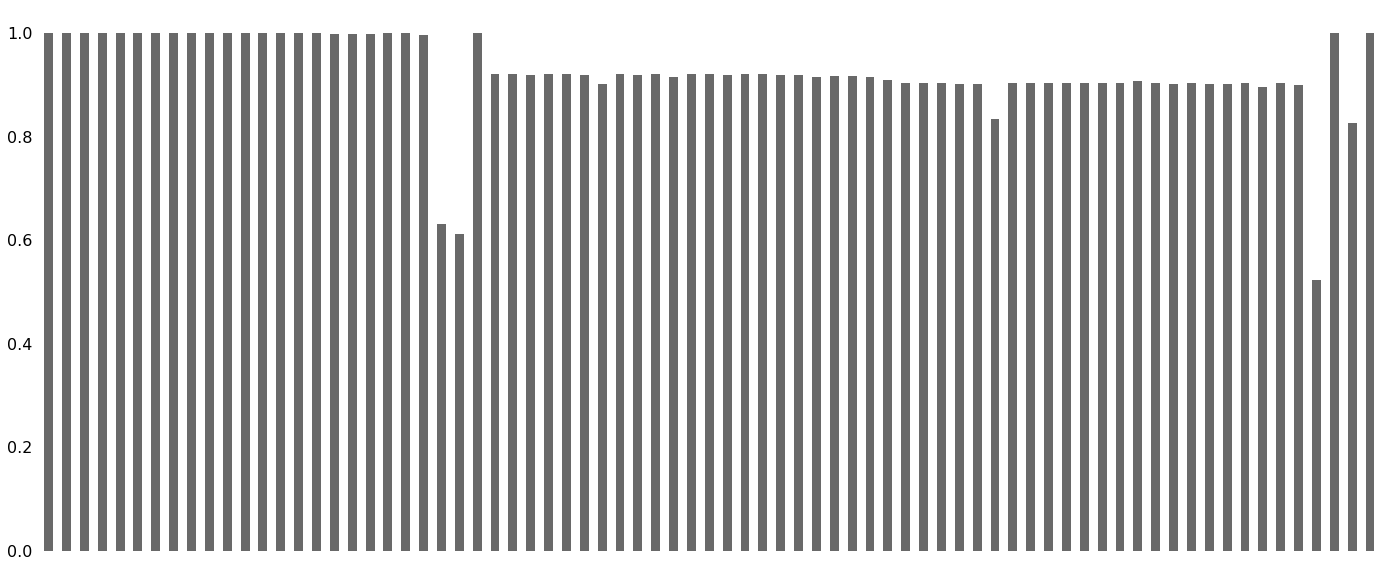

In [396]:
msno.bar(df)

In [397]:
df = df.fillna(df.median())

In [398]:
df.isnull().sum()

Unnamed: 0    0
id            0
parity        0
childwt       0
logit         0
             ..
db            0
wg1           0
wg2           0
BMI           0
lda           0
Length: 75, dtype: int64

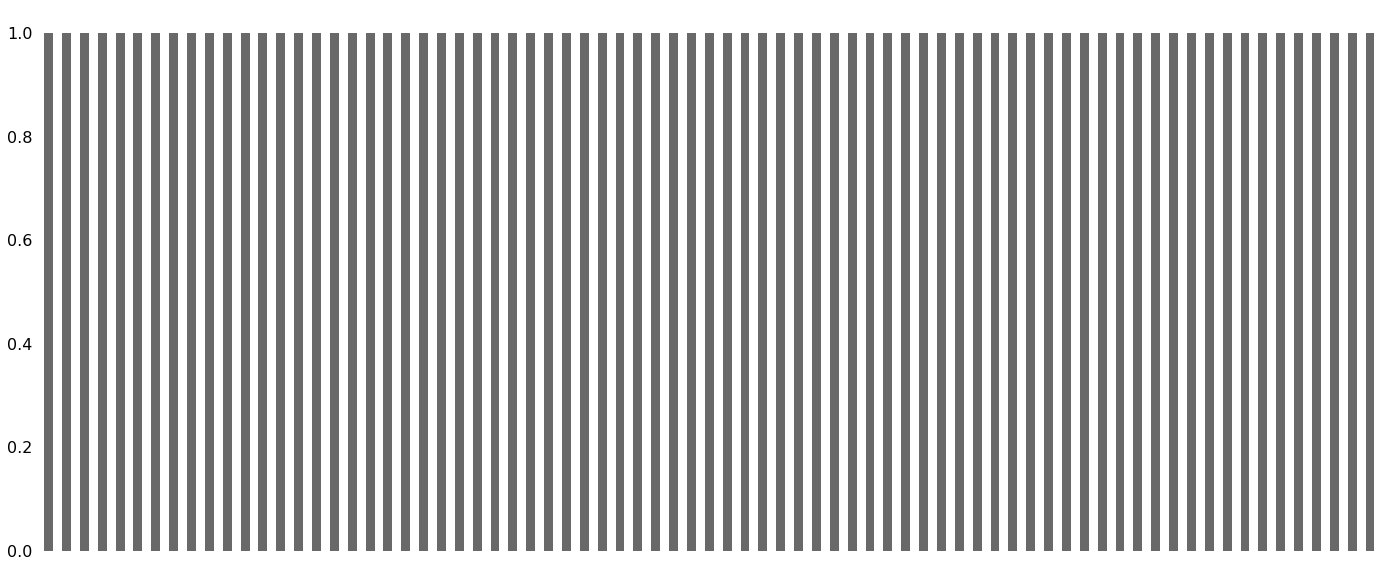

In [399]:
msno.bar(df)

# Data Exploration

Following investigation has been done:
    1. How many newborns weight is below 2.5 Kg(Low Birth Weight) and above 2.5(Normal Birth Weight) in the dataset 
    2. Is fever, Asthma and Anemia during pregnency is common and does it have any impact on newborn's weight ??
    3. Relationship between mother's age and Low Birth Weight.
    4. BMI,Fundal Height for LBW and NBW


In [400]:
lbw_childwt = df[df['childwt']<2.5]
lbw_count = lbw_childwt['childwt'].count()
lbw_count

162

In [401]:
nbw_childwt = df[df['childwt']>=2.5]
nbw_count = nbw_childwt['childwt'].count()
nbw_count

504

In [402]:
def barplot(v1,v2,cnt1,cnt2,v1_clr,v2_clr,wth,lbls1,lbls2,title):
    fig = plt.figure()
    ax = fig.add_axes([1,1,1,1])

    ax.bar(v1,cnt1,color = v1_clr, width = wth)
    ax.bar(v2,cnt2,color = v2_clr, width = wth)
    ax.legend(labels=[lbls1, lbls2])
    ax.set_title(title)
    plt.show()

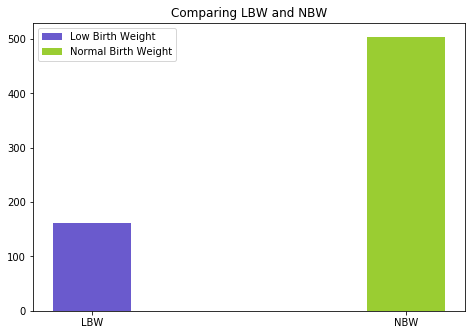

In [403]:
#barplot(v1,v2,cnt1,cnt2,v1_clr,v2_clr,wth,lbls1,lbls2)
barplot('LBW','NBW',lbw_count,nbw_count,'slateblue','yellowgreen',0.25,'Low Birth Weight','Normal Birth Weight','Comparing LBW and NBW')

 In the dataset number of low birth weight newborn is 3 times less than normal birth weight newborn

## Cheking Fever, Asthma, Anemia for LBW and NBW

In [404]:
nbw_fever_counts = nbw_childwt['fever'].value_counts()
nbw_asthma_counts = nbw_childwt['asthm'].value_counts()
nbw_anemia_counts = nbw_childwt['anemia'].value_counts()
print("For Normal Birth Weight \n")

print("No Fever: ",nbw_fever_counts[0]," No Asthma: ",nbw_asthma_counts[0]," No Anemia: ",nbw_anemia_counts[0])
print("\n Fever: ",nbw_fever_counts[1]," Asthma: ",nbw_asthma_counts[1]," Anemia: ",nbw_anemia_counts[1])

For Normal Birth Weight 

No Fever:  493  No Asthma:  476  No Anemia:  144

 Fever:  11  Asthma:  28  Anemia:  360


In [405]:
lbw_fever_counts = lbw_childwt['fever'].value_counts()
lbw_asthma_counts = lbw_childwt['asthm'].value_counts()
lbw_anemia_counts = lbw_childwt['anemia'].value_counts()
print("For Lormal Birth Weight \n")

print("No Fever: ",lbw_fever_counts[0]," No Asthma: ",lbw_asthma_counts[0]," No Anemia: ",lbw_anemia_counts[0])
print("\n Fever: ",lbw_fever_counts[1]," Asthma: ",lbw_asthma_counts[1]," Anemia: ",lbw_anemia_counts[1])

For Lormal Birth Weight 

No Fever:  159  No Asthma:  153  No Anemia:  60

 Fever:  3  Asthma:  9  Anemia:  102


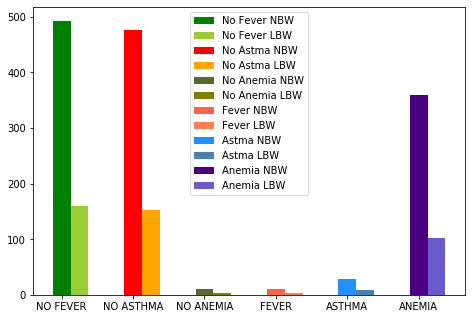

In [406]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

xlabels= ['NO FEVER','NO ASTHMA', 'NO ANEMIA', 'FEVER', 'ASTHMA','ANEMIA']
x_pos = [i for i, _ in enumerate(xlabels)]

ax.bar(0 + 0.00,nbw_fever_counts[0], color = 'g', width = 0.25)
ax.bar(0 + 0.25,lbw_fever_counts[0], color = 'yellowgreen', width = 0.25)

ax.bar(1 + 0.00,nbw_asthma_counts[0], color = 'red', width = 0.25)
ax.bar(1 + 0.25,lbw_asthma_counts[0], color = 'orange', width = 0.25)

ax.bar(2 + 0.00,nbw_fever_counts[1], color = 'darkolivegreen', width = 0.25)
ax.bar(2 + 0.25,lbw_fever_counts[1], color = 'olive', width = 0.25)

ax.bar(3 + 0.00,nbw_fever_counts[1], color = 'tomato', width = 0.25)
ax.bar(3 + 0.25,lbw_fever_counts[1], color = 'coral', width = 0.25)

ax.bar(4 + 0.00,nbw_asthma_counts[1], color = 'dodgerblue', width = 0.25)
ax.bar(4 + 0.25,lbw_asthma_counts[1], color = 'steelblue', width = 0.25)

ax.bar(5 + 0.00,nbw_anemia_counts[1], color = 'indigo', width = 0.25)
ax.bar(5 + 0.25,lbw_anemia_counts[1], color = 'slateblue', width = 0.25)

plt.xticks(x_pos, xlabels)


ax.legend(labels=['No Fever NBW','No Fever LBW','No Astma NBW','No Astma LBW','No Anemia NBW','No Anemia LBW','Fever NBW',
                  'Fever LBW','Astma NBW','Astma LBW','Anemia NBW','Anemia LBW'])

For Both cases most of the mothers do not have fever and asthma. However anemia is more common

### % of Anemia and No Anemia among NBW and LBW

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x249a3034388>)

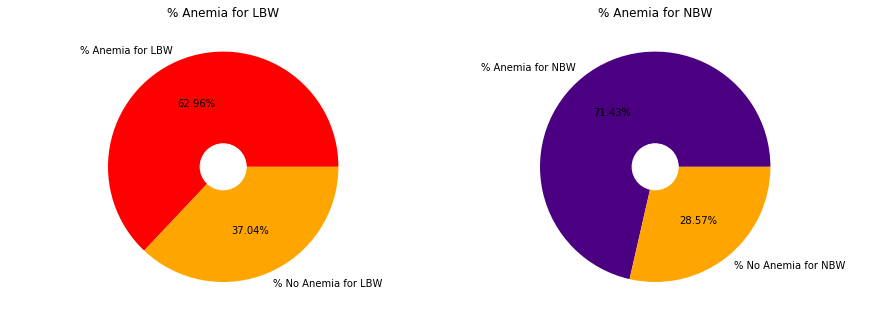

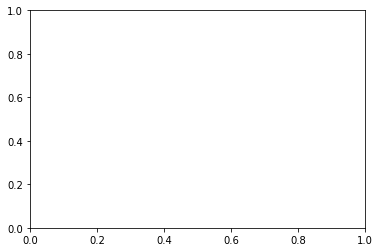

In [407]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
feature_names = "% Anemia for LBW","% No Anemia for LBW"
feature_size = [lbw_anemia_counts[1],lbw_anemia_counts[0]]
circle = plt.Circle((0,0),0.2,color = "white")
ax.pie(feature_size, labels = feature_names,colors = ["red","orange"],autopct='%1.2f%%')
plt.title("% Anemia for LBW")
p = plt.gcf()
p.gca().add_artist(circle)

ax = fig.add_axes([1,0,1,1])
ax.axis('equal')
feature_names = "% Anemia for NBW","% No Anemia for NBW"
feature_size = [nbw_anemia_counts[1],nbw_anemia_counts[0]]
circle = plt.Circle((0,0),0.2,color = "white")
ax.pie(feature_size, labels = feature_names,colors = ["indigo","orange"],autopct='%1.2f%%')

p = plt.gcf()
p.gca().add_artist(circle)
plt.title("% Anemia for NBW")

plt.subplots()

In [408]:
df[['fand1','childwt']]

,fand1,childwt
0,17.0,3.4
1,11.8,3.5
2,19.0,3.0
3,12.0,3.0
4,12.0,3.0
...,...,...
661,16.8,2.7
662,13.0,3.3
663,12.5,2.9
664,9.2,2.9


In [409]:
# sorting for fundal height
fundal_height=df.sort_values(by=['fand1'])
plot_fundal_height = fundal_height[['fand1','childwt']]
plot_fundal_height.head()

,fand1,childwt
478,4.5,2.100
93,5.8,2.500
459,7.0,2.105
200,7.5,2.250
499,8.0,2.300


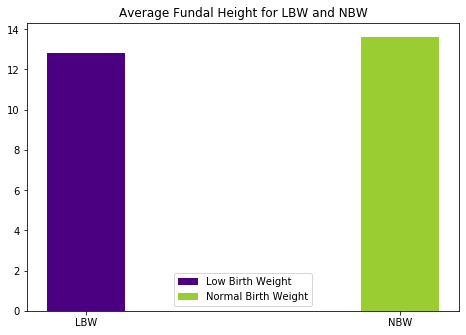

In [410]:
lbw_fand1 = lbw_childwt['fand1'].mean()
nbw_fand1 = nbw_childwt['fand1'].mean()
#barplot(v1,v2,cnt1,cnt2,v1_clr,v2_clr,wth,lbls1,lbls2,title)
barplot('LBW','NBW',lbw_fand1,nbw_fand1,'indigo','yellowgreen',0.25,'Low Birth Weight','Normal Birth Weight',
        'Average Fundal Height for LBW and NBW')

### Investigating Logit Column

Low Birth Rate
0    162
Name: logit, dtype: int64

 Normal Birth Rate
1    504
Name: logit, dtype: int64


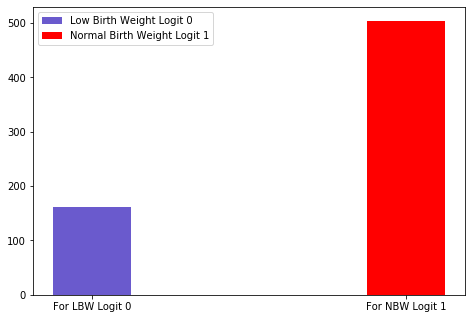

In [411]:
print("Low Birth Rate")
print(lbw_childwt['logit'].value_counts())
print("\n Normal Birth Rate")
print(nbw_childwt['logit'].value_counts())

#barplot(v1,v2,cnt1,cnt2,v1_clr,v2_clr,wth,lbls1,lbls2)
barplot('For LBW Logit 0','For NBW Logit 1',lbw_childwt['logit'].value_counts(),
        nbw_childwt['logit'].value_counts(),'slateblue','red',0.25,'Low Birth Weight Logit 0','Normal Birth Weight Logit 1','')

In [412]:
nbw_childwt['logit'].value_counts()

1    504
Name: logit, dtype: int64

## Relationship between mother's age and Low Birth Rate

In [413]:
mage_below_25 = lbw_childwt[lbw_childwt['mage']<=25]
mage_above_25 = lbw_childwt[lbw_childwt['mage']>25]

mage_below = mage_below_25['mage'].count()
mage_above = mage_above_25['mage'].count()
print("For Low Birth Weight")
print("Mother's Age Below 25: ",mage_below)
print("Mother's Age Above 25: ",mage_above)

For Low Birth Weight
Mother's Age Below 25:  146
Mother's Age Above 25:  16


##### Pie Plot to find % of Mother's Age below and above 25

In [414]:
def pieplot(f_name1,f_name2 ,x1,x2,color_1,color_2):
    
    fig = plt.figure()
    ax = fig.add_axes([0,0,1,1])
    ax.axis('equal')
    feature_names = f_name1,f_name2
    feature_size = [x1,x2]
    circle = plt.Circle((0,0),0.2,color = "white")
    ax.pie(feature_size, labels = feature_names,colors = [color_1,color_2],autopct='%1.2f%%')
    p = plt.gcf()
    p.gca().add_artist(circle)
    plt.show()

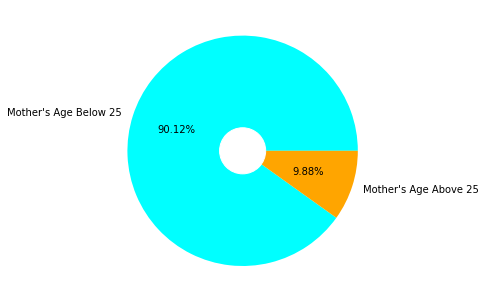

In [415]:
#pieplot(feature_names, x1,x2,color_1,color_2)
pieplot("Mother's Age Below 25","Mother's Age Above 25", mage_below,mage_above,"cyan","orange")

According to the piechart newborn have 90% chance to have Low Birth Weight if Mother's age is below 25.

In [416]:
mage_below_25['occup'].value_counts()

0    105
1     30
2     11
Name: occup, dtype: int64

In [417]:
mage_below_25['educ'].value_counts()

0    120
1     26
Name: educ, dtype: int64

In [418]:
nbw_childwt['educ'].value_counts()

0    368
1    136
Name: educ, dtype: int64

In [419]:
lbw_childwt['educ'].value_counts()

0    130
1     32
Name: educ, dtype: int64

### Model Building

In [420]:
df['childwt']=np.where((df['childwt']<=2.5),0,1)

In [421]:
df

,Unnamed: 0,id,parity,childwt,logit,mage,mwt,mht,mdarm,head,relg,habit,occup,educ,workload,f11,f21,f31,f41,anemia,asthma,wm18,ageyc,boh,ecostat,mwt2,belly1,fand1,sis1,dis1,inject,falif,iron,worklo,f12,f22,f32,f42,rest,conv1,d21,bleed1,blddef1,asthma2,fever1,lomot1,contab1,db1,mwt3,belly2,fand2,sis2,dia2,inject2,falif2,iron2,workl,f13,f23,f33,f43,rest1,conv2,d,bleed,blddef,asthm,fever,lomot,contab,db,wg1,wg2,BMI,lda
0,42,101007,3,1,1,26.83,39.75,1.50,20.0,51.0,1,0,0,0,1,5,3.0,0.0,0.0,1,0,2.0,1.75,0.0,0,43.0,71.5,17.0,100.0,70.0,0.0,20.0,0.0,1.0,6.0,2.0,0.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,46.10,80.5,25.4,100.0,80.0,1.0,30.0,1.0,1.0,3.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3.25,6.35,17.666667,1
1,27,101008,4,1,1,17.92,45.00,1.52,22.0,52.0,1,0,0,0,1,3,1.0,0.0,2.0,1,0,2.0,0.00,1.0,0,44.5,72.2,11.8,108.0,68.0,1.0,30.0,0.0,1.0,5.0,4.0,3.0,5.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,46.85,78.0,20.0,104.0,68.0,2.0,50.0,1.0,1.0,5.0,4.0,0.0,3.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,-0.50,-45.00,19.477147,1
2,158,101009,1,1,1,35.00,43.00,1.50,20.0,53.0,0,1,1,1,1,7,5.0,0.0,4.0,1,0,2.0,4.00,1.0,1,47.0,79.5,19.0,98.0,60.0,2.0,50.0,1.0,1.0,6.0,5.0,1.0,2.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,47.50,81.5,23.0,90.0,50.0,2.0,15.0,1.0,1.0,7.0,5.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.00,4.50,19.111111,1
3,156,101010,1,1,1,26.00,40.00,1.48,21.0,51.5,1,0,1,0,1,2,3.0,7.0,4.0,0,0,1.0,8.00,0.0,2,44.0,71.5,12.0,100.0,50.0,2.0,13.0,1.0,1.0,7.0,4.0,7.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,47.00,78.0,20.0,102.0,52.0,2.0,50.0,1.0,1.0,7.0,3.0,7.0,2.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,4.00,7.00,18.261505,1
4,155,101013,1,1,1,25.00,56.00,1.51,28.0,49.5,1,0,1,0,1,7,5.0,2.0,7.0,0,0,1.0,5.00,0.0,1,54.5,83.0,12.0,106.0,42.0,2.0,20.0,0.0,1.0,7.0,4.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,59.50,85.5,19.0,98.0,62.0,2.0,30.0,1.0,1.0,7.0,3.0,1.0,7.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,-1.50,3.50,24.560326,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
661,257,211029,3,1,1,20.83,46.50,1.56,20.5,53.0,1,0,0,0,1,7,4.0,7.0,7.0,1,0,5.0,1.17,1.0,2,47.2,74.8,16.8,120.0,70.0,1.0,10.0,0.0,1.0,4.0,3.0,4.0,7.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,50.00,86.5,22.5,110.0,60.0,2.0,6.0,0.0,1.0,5.0,2.0,0.0,7.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.70,3.50,19.107495,1
662,509,211037,1,1,1,17.83,40.90,1.49,22.0,51.0,1,1,0,1,1,6,6.0,0.0,2.0,1,0,2.0,2.50,0.5,1,41.9,68.5,13.0,118.0,70.0,1.0,15.0,1.0,1.0,6.0,3.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,45.50,77.2,20.2,92.0,68.0,2.0,1.0,30.0,1.0,1.0,3.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.50,4.60,18.422594,1
663,539,211040,1,1,1,18.00,42.00,1.54,22.0,51.0,0,0,0,0,1,6,4.0,0.0,0.0,0,0,1.0,2.50,0.5,2,46.0,74.0,12.5,100.0,70.0,2.0,3.0,1.0,1.0,7.0,7.0,0.0,5.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,47.50,77.5,19.2,70.0,2.0,2.0,75.0,1.0,1.0,7.0,7.0,7.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.50,5.50,17.709563,1
664,171,211042,2,1,1,23.00,55.00,1.45,27.0,52.5,0,0,0,0,1,7,7.0,0.0,1.0,1,0,1.0,2.50,1.0,2,54.0,80.5,9.2,100.0,60.0,2.0,6.0,0.0,1.0,7.0,5.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,54.50,93.0,21.4,84.0,54.0,2.0,105.0,1.0,1.0,7.0,7.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-1.00,-0.50,26.159334,1


In [422]:
cols = ['Unnamed: 0', 'id','wg2','logit','childwt','wg1','db','contab','lomot','fever','asthm','blddef','bleed','d','conv2','sis1', 'dis1', 'inject', 'falif',
       'iron', 'worklo','conv1', 'd21','bleed1', 'blddef1', 'asthma2', 'fever1', 'lomot1', 'contab1', 'db1'
        ,'anemia', 'asthma', 'wm18', 'ageyc', 'boh', 'relg','dia2', 'inject2', 'falif2', 'iron2', 'workl'
       ,'sis2',]
         # 'educ', 'workload','fand2',
       #'mwt',,'mdarm','f23', 'f22','f33', 'f43','rest1','f21', 'f31', 'f41','fand2','ecostat',
       #'f11','habit']

In [423]:
X = df.drop(df[cols],axis=1)

y = df['childwt']

print(X.shape)
print(y.shape)

(666, 33)
(666,)


In [424]:
X.columns

Index(['parity', 'mage', 'mwt', 'mht', 'mdarm', 'head', 'habit', 'occup',
       'educ', 'workload', 'f11', 'f21', 'f31', 'f41', 'ecostat', 'mwt2',
       'belly1', 'fand1', 'f12', 'f22', 'f32', 'f42', 'rest', 'mwt3', 'belly2',
       'fand2', 'f13', 'f23', 'f33', 'f43', 'rest1', 'BMI', 'lda'],
      dtype='object')

#### Model Summary

In [425]:
model= sm.OLS(y, X).fit()

In [426]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                childwt   R-squared (uncentered):                   0.849
Model:                            OLS   Adj. R-squared (uncentered):              0.841
Method:                 Least Squares   F-statistic:                              107.6
Date:                Wed, 15 Sep 2021   Prob (F-statistic):                   3.04e-235
Time:                        13:08:22   Log-Likelihood:                         -160.12
No. Observations:                 666   AIC:                                      386.2
Df Residuals:                     633   BIC:                                      534.8
Df Model:                          33                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
parity         0.0328      0.011      2.881      0.004       0.010       0.055
mage          -0.0015      0.004     -0.421      0.674      -0.009       0.006
mwt           -0.0058      0.006     -0.990      0.323      -0.017       0.006
mht           -0.0343      0.227     -0.151      0.880      -0.480       0.411
mdarm         -0.0021      0.009     -0.235      0.814      -0.020       0.016
head           0.0011      0.007      0.161      0.872      -0.013       0.015
habit         -0.0344      0.049     -0.700      0.484      -0.131       0.062
occup         -0.1371      0.021     -6.624      0.000      -0.178      -0.096
educ           0.0508      0.031      1.623      0.105      -0.011       0.112
workload       0.1628      0.061      2.653      0.008       0.042       0.283
f11            0.0062      0.006      0.965      0.335      -0.006       0.019
f21           -0.0016      0.006     -0.252      0.801      -0.014       0.011
f31            0.0119      0.006      2.068      0.039       0.001       0.023
f41           -0.0084      0.006     -1.458      0.145      -0.020       0.003
ecostat       -0.0136      0.017     -0.812      0.417      -0.046       0.019
mwt2           0.0020      0.007      0.308      0.758      -0.011       0.015
belly1         0.0027      0.004      0.662      0.508      -0.005       0.011
fand1          0.0057      0.005      1.043      0.297      -0.005       0.017
f12            0.0092      0.007      1.244      0.214      -0.005       0.024
f22           -0.0073      0.007     -0.995      0.320      -0.022       0.007
f32           -0.0043      0.006     -0.782      0.435      -0.015       0.007
f42           -0.0023      0.006     -0.368      0.713      -0.015       0.010
rest           0.0559      0.027      2.071      0.039       0.003       0.109
mwt3           0.0041      0.005      0.778      0.437      -0.006       0.014
belly2        -0.0012      0.003     -0.405      0.686      -0.007       0.005
fand2          0.0023      0.002      1.251      0.212      -0.001       0.006
f13            0.0079      0.007      1.118      0.264      -0.006       0.022
f23           -0.0025      0.008     -0.335      0.738      -0.017       0.012
f33            0.0102      0.005      1.997      0.046       0.000       0.020
f43            0.0005      0.006      0.081      0.935      -0.012       0.013
rest1          0.0180      0.029      0.618      0.537      -0.039       0.075
BMI           -0.0006      0.010     -0.064      0.949      -0.020       0.019
lda            0.3979      0.016     25.588      0.000       0.367       0.428
==============================================================================
Omnibus:                      183.616   Durbin-Watson:       

In [427]:
def vif():

    # VIF dataframe
    vif_data = pd.DataFrame()
    vif_data["feature"] = X.columns

    # calculating VIF for each feature
    vif_data["VIF"] = [variance_inflation_factor(X.values, i)
    for i in range(len(X.columns))]

    print(vif_data)

In [428]:
vif()

     feature         VIF
0     parity    4.813873
1       mage   45.746047
2        mwt  447.877853
3        mht  782.854568
4      mdarm  252.891192
5       head  854.305793
6      habit    1.190845
7      occup    1.729351
8       educ    1.654282
9   workload   24.043315
10       f11    6.840548
11       f21    4.740769
12       f31    1.697254
13       f41    2.837103
14   ecostat    2.912694
15      mwt2  608.998051
16    belly1  580.148601
17     fand1   37.661650
18       f12   10.216639
19       f22    7.821207
20       f32    2.127077
21       f42    3.251440
22      rest    1.921370
23      mwt3  416.919606
24    belly2  390.123760
25     fand2   10.784324
26       f13    9.249874
27       f23    8.393926
28       f33    2.075791
29       f43    3.510247
30     rest1    1.743467
31       BMI  248.169238
32       lda    1.616111


In [429]:
# first one
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.76, test_size=0.24, random_state=15)

print(X_train.shape)
print(X_test.shape)

print(y_train.shape)
print(y_test.shape)

(506, 33)
(160, 33)
(506,)
(160,)


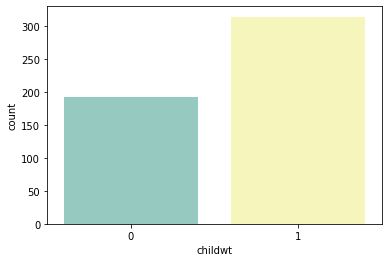

In [430]:
# Investigating the distr of all ys

ax = sns.countplot(x = y_train, palette = "Set3")

## Logistic Regression 

In [431]:
def log_regression():

    # coef_ - Coefficient of the features in the decision function
    print(log_reg.coef_ ,'\n')
    
    print('---------------------------------------------------------------------')
    
    # Accuracy on Train
    print("The Training Accuracy is: ", log_reg.score(X_train, y_train))

    # Accuracy on Test
    print("The Testing Accuracy is: ", log_reg.score(X_test, y_test))
    
    print('---------------------------------------------------------------------')

    # Classification Report
    print('Classification Report')
    print(classification_report(y_train, y_pred))

In [432]:
# Training my model
log_reg = LogisticRegression(random_state=10, solver = 'lbfgs')
log_reg.fit(X_train, y_train)
# predict - Predict class labels for samples in X
y_pred = log_reg.predict(X_train)
# predict_proba - Probability estimates
pred_proba = log_reg.predict_proba(X_train)
log_regression()

[[ 0.39469813 -0.02050189 -0.06650248 -0.04421177  0.02179117 -0.05669081
  -0.04956963 -1.22206988  0.29272349  0.31515508  0.03742665  0.0939301
   0.19145439 -0.12895538 -0.31661582  0.08615098  0.04951714  0.04282232
   0.11163643 -0.09605763 -0.03915803 -0.09890514  0.63912973  0.00793137
  -0.05196257  0.0279712   0.04100617 -0.08115245  0.09602359  0.05060068
   0.15672657 -0.08578701  3.44528328]] 

---------------------------------------------------------------------
The Training Accuracy is:  0.8853754940711462
The Testing Accuracy is:  0.84375
---------------------------------------------------------------------
Classification Report
              precision    recall  f1-score   support

           0       0.95      0.74      0.83       192
           1       0.86      0.97      0.91       314

    accuracy                           0.89       506
   macro avg       0.90      0.86      0.87       506
weighted avg       0.89      0.89      0.88       506



E:\Anaconda\Anaconda2\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


##  Confusion Matrix function

In [433]:
def plot_confusion_matrix(cm, classes=None, title='Confusion matrix'):
    """Plots a confusion matrix."""
    if classes is not None:
        sns.heatmap(cm, cmap="YlGnBu", xticklabels=classes, yticklabels=classes, vmin=0., vmax=1., annot=True, annot_kws={'size':30})
    else:
        sns.heatmap(cm, vmin=0., vmax=1.)
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

[[0.73958333 0.26041667]
 [0.02547771 0.97452229]]


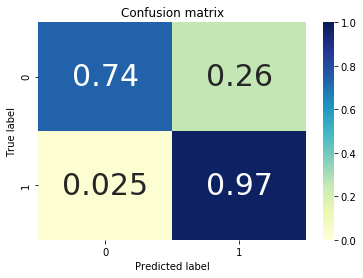

In [434]:
cm = confusion_matrix(y_train, y_pred)
cm_norm = cm / cm.sum(axis=1).reshape(-1,1)
cm.sum(axis=1)
plot_confusion_matrix(cm_norm, classes = log_reg.classes_, title='Confusion matrix')
print(cm_norm)

#### Log loss 

In [435]:
# Running Log loss on training
print("The Log Loss on Training is: ", log_loss(y_train, pred_proba))

# Running Log loss on testing
pred_proba_t = log_reg.predict_proba(X_test)
print("The Log Loss on Testing Dataset is: ", log_loss(y_test, pred_proba_t))

The Log Loss on Training is:  0.2708820845226125
The Log Loss on Testing Dataset is:  0.38081140740288255


### K-Fold Cross Validation

In [436]:
def Kfold(kfold,model_kfold):
    results_kfold = model_selection.cross_val_score(model_kfold, X, y, cv=kfold)
    print("Accuracy: %.2f%%" % (results_kfold.mean()*100.0))

In [437]:
kfold = model_selection.KFold(n_splits=10, random_state=100)
model_kfold = LogisticRegression()
Kfold(kfold,model_kfold)

E:\Anaconda\Anaconda2\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
E:\Anaconda\Anaconda2\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
E:\Anaconda\Anaconda2\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase th

Accuracy: 85.58%


E:\Anaconda\Anaconda2\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
E:\Anaconda\Anaconda2\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regressio

### Random Forest Classifier

In [438]:
def randomforest_classifier():
    #y_rpred=random_forest.predict(X_test)
    #print(accuracy_score(y_test,y_rpred))
    #print(classification_report(y_test,y_rpred))
    
    # coef_ - Coefficient of the features in the decision function
    #print(random_forest.coef_ ,'\n')
    
    print('---------------------------------------------------------------------')
    
    # Accuracy on Train
    print("The Training Accuracy is: ", random_forest.score(X_train, y_train))

    # Accuracy on Test
    print("The Testing Accuracy is: ", random_forest.score(X_test, y_test))
    
    print('---------------------------------------------------------------------')

    # Classification Report
    print('Classification Report')
    print(classification_report(y_train, y_pred))

In [439]:
random_forest=RandomForestClassifier(random_state=10)
random_forest.fit(X_train,y_train)
y_pred = random_forest.predict(X_train)
# predict_proba - Probability estimates
pred_proba = random_forest.predict_proba(X_train)
randomforest_classifier()

---------------------------------------------------------------------
The Training Accuracy is:  1.0
The Testing Accuracy is:  0.88125
---------------------------------------------------------------------
Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       192
           1       1.00      1.00      1.00       314

    accuracy                           1.00       506
   macro avg       1.00      1.00      1.00       506
weighted avg       1.00      1.00      1.00       506



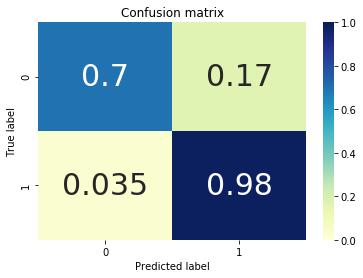

In [440]:
cm = confusion_matrix(y_test,y_rpred)
cm_norm = cm / cm.sum(axis=1)
#sns.heatmap(cm)
plot_confusion_matrix(cm_norm, classes = classifier.classes_, title='Confusion matrix')

### ROC Curve

In [441]:
r_probs = [0 for _ in range(len(y_test))]

logreg_probs = log_reg.predict_proba(X_test)
rf_probs = random_forest.predict_proba(X_test)

In [442]:
logreg_probs = logreg_probs[:, 1]
rf_probs = rf_probs[:, 1]

In [443]:
r_auc = roc_auc_score(y_test, r_probs)
logreg_auc = roc_auc_score(y_test, logreg_probs)
rf_auc = roc_auc_score(y_test, rf_probs)

In [444]:
def roc_plot(r_fpr,r_tpr,rf_fpr, rf_tpr,nb_fpr, nb_tpr):
    
    print('Random prediction (AUROC = %0.3f)', r_auc)
    print('Logistic Regression (AUROC = %0.3f)', logreg_auc)
    print('Random Forest (AUROC = %0.3f)', rf_auc)
    
    plt.plot(r_fpr, r_tpr, linestyle='--', label='Random prediction (AUROC = %0.3f)' % r_auc)
    plt.plot(nb_fpr, nb_tpr, marker='.', label='Logistic Regression (AUROC = %0.3f)' % logreg_auc)
    plt.plot(rf_fpr, rf_tpr, marker='.', label='Random Forest (AUROC = %0.3f)' % rf_auc)

    # Title
    plt.title('ROC Plot')
    # Axis labels
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    # Show legend
    plt.legend() # 
    # Show plot
    plt.show()

Random prediction (AUROC = %0.3f) 0.5
Logistic Regression (AUROC = %0.3f) 0.8640776699029127
Random Forest (AUROC = %0.3f) 0.9416624084483052


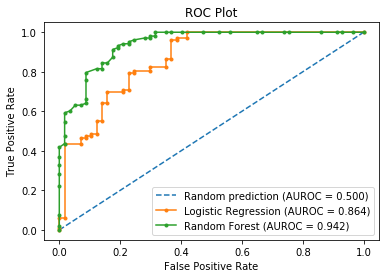

In [445]:
r_fpr, r_tpr, _ = roc_curve(y_test, r_probs)
nb_fpr, nb_tpr, _ = roc_curve(y_test, logreg_probs)
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs)
roc_plot(r_fpr,r_tpr,rf_fpr, rf_tpr,nb_fpr, nb_tpr)